In [2]:
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_excel(r"C:\Users\nunez\OneDrive\Escritorio\Bases\base_2012_2022_limpia.xlsx")
df["TIPO_OBRA"] = df["TIPO_OBRA"].astype(str)
df = df[df["TIPO_OBRA"] == "1"]

GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))
boundary = unary_union(geojson["geometry"]).exterior
joined = gpd.sjoin(gdf, geojson, op='within')
points_within_boundary = joined[joined.index_right.notnull()]
points_within_boundary["TIPO_OBRA"] = points_within_boundary["TIPO_OBRA"].astype(str)
df = points_within_boundary

#clean_df = clean_df[(clean_df["USO_1"] == "VIVIENDA UNIFAMILIAR") | (clean_df["USO_1"] == "VIVIENDA MULTIFAMILIAR")]
df = df[df["TIPO_OBRA"] == "1"]
#clean_df = clean_df[clean_df["USO_1"] == "LOCAL COMERCIAL"]

C:\Users\nunez\PycharmProjects\Permisos_de_obra\venv\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\nunez\AppData\Local\Temp\ipykernel_13856\2285083478.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANIO,MES,TRIMESTRE,FECHA,DIRECCION,TIPO_OBRA,TIPO_OBRA_CUR,...,add,location,address,geometry,index_right,BARRIO,COMUNA_right,PERIMETRO,AREA,OBJETO
0,0,0.0,7,2022,1,1.0,3 ene 2022,GUARDIA VIEJA 3764,1,OBRA MAYOR,...,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",0.0,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",POINT (-58.41723 -34.60122),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
2,2,2.0,9,2022,3,1.0,3 mar 2022,RAWSON 276,1,Obra Mayor,...,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2.0,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",POINT (-58.42628 -34.60916),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
4,4,4.0,11,2022,3,1.0,2 mar 2022,LAMBARE 847,1,OBRA MAYOR,...,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",4.0,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",POINT (-58.43047 -34.60510),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
5,5,5.0,12,2022,3,1.0,4 mar 2022,HUMAHUACA 3787,1,OBRA MAYOR,...,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",5.0,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",POINT (-58.41762 -34.60217),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
6,6,6.0,13,2022,2,1.0,1 feb 2022,SARMIENTO 4088,1,OBRA MAYOR,...,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",6.0,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",POINT (-58.42254 -34.60481),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23545,19622,NaN,16199,2018,3,1.0,2018-03-27 00:00:00,SIN NOMBRE,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.35121 -34.61759),40,PUERTO MADERO,1.0,17725.720821,5.040971e+06,BARRIO
23546,19623,NaN,16200,2018,3,1.0,2018-03-27 00:00:00,SIN NOMBRE,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.35440 -34.61891),40,PUERTO MADERO,1.0,17725.720821,5.040971e+06,BARRIO
23547,19624,NaN,16201,2018,4,2.0,18991230,SIN NOMBRE,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.35334 -34.61861),40,PUERTO MADERO,1.0,17725.720821,5.040971e+06,BARRIO
23548,19625,NaN,16202,2018,4,2.0,2018-04-06 00:00:00,SIN NOMBRE,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.35153 -34.61820),40,PUERTO MADERO,1.0,17725.720821,5.040971e+06,BARRIO


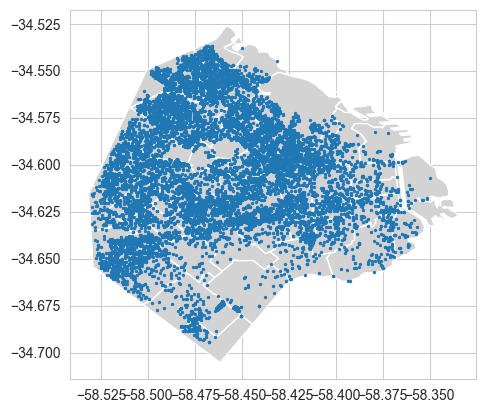

In [11]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
df.plot(ax=ax, markersize=2)
#points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

for i in df["USO_1"].unique():
    fig, ax = plt.subplots()
    fig.set_dpi(10)
    sns.set_style("white")
    geojson["geometry"].plot(ax=ax, color='lightgrey')
    sns.kdeplot(data=df[(df["USO_1"] == i) | (df["ANIO"] == 2022)],y="Latitud",x="Longitud",ax=ax, levels=200,
                fill=True,
                alpha=0.5,
                cmap="Reds").set(title=f"Uso: {i}. 2022")
    ax.set_axis_off()
    plt.show()
    fig, ax = plt.subplots()
    #fig.set_dpi(900)
    sns.set_style("white")
    geojson["geometry"].plot(ax=ax, color='lightgrey')
    sns.kdeplot(data=df[df["USO_1"] == i],y="Latitud",x="Longitud",ax=ax, levels=300,
                fill=True,
                alpha=0.2,
                cmap="Reds").set(title=f"Uso: {i}. 2012-2022")
    ax.set_axis_off()
    plt.close()


#plt.savefig("comercios_hetmap.png",dpi=1000)


In [ ]:
usos_todos = df["USO_1"].unique()

for x in df[df["USO_1"] == "VIVIENDA MULTIFAMILIAR"]:
    cols=3
    rows=3
    años =range(2014,2023)
    fig, ax = plt.subplots(rows, cols, figsize=(30, 30), dpi=200)
    fig.suptitle(x)
    for i,j in zip(range(cols*rows),años):
        ax = plt.subplot(rows,cols,i+1)
        ax.set_axis_off()
        geojson["geometry"].plot(ax=ax, color='lightgrey')
        sns.kdeplot(data=df[(df["USO_1"] == x) | (df["ANIO"] == j)],y="Latitud",x="Longitud",ax=ax,levels=200,
                    fill=True,
                    alpha=0.5,
                    cmap="Reds").set(title=f"Año {j}")
    #plt.show()
    #plt.savefig(rf"C:\Users\nunez\OneDrive\Escritorio\mapas\{str(x)}.png")
    plt.close()